<a href="https://colab.research.google.com/github/HoangTung99/CS114.L11.KHCL/blob/master/NT006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tham gia Compete: House Prices - Advanced Regression Techniques

**1. Mô tả bài toán**

Input: Một bức ảnh có chứa 1 gương trong đó mặt người, gương mặt người phải có cảm xúc là 1 trong 6 loại sau (angry, fear, happy, sad, neutral, surprise)

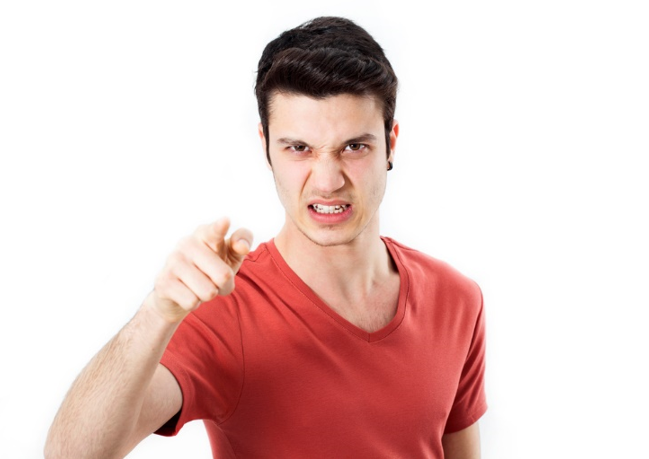

Ouput: Trả ra bức ảnh đó kèm theo 1 bounding box quanh gương mặt, góc trên bên trái của bouding box có kèm 1 label thể hiện tên của 1 trong 6 loại cảm xúc (angry, fear, happy, sad, neutral, surprise)

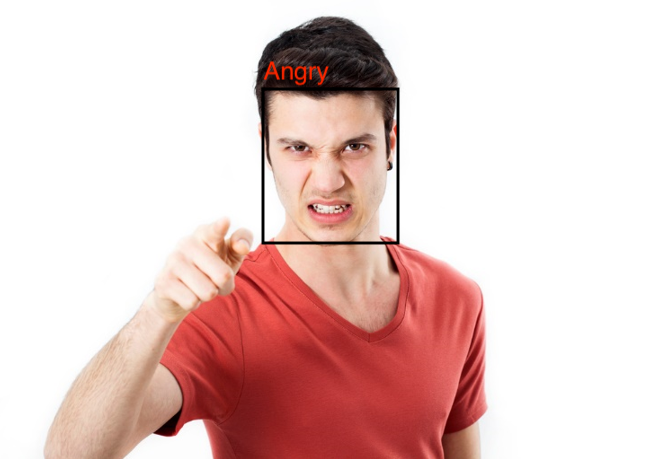

**2. Mô tả bộ dữ liệu**

**Nguồn**

Thu nhặt ảnh từ nhiều nguồn thông qua google image

**Quá trình thu nhặt ảnh**
* Tạo công cụ hỗ trợ chuẩn hoá ảnh
* Tìm kiếm ảnh trên internet
* Đưa đường link ảnh vào công cụ chuẩn hoá
* Lấy ảnh cho ra từ công cụ chuẩn hoá

**Công cụ chuẩn hoá**
- Input: Đường link ảnh có chứa ít nhất 1 gương mặt người
- Output: 1 cơ số ảnh, với mỗi ảnh sẽ: Chứa đúng 1 gương mặt người, ảnh được gray scale và resize kích thước (48x48)


**Số Sample**: 9216

Phân chia dữ liệu:
dev: 60%
validation: 20%
test: 20%

**3. Mô tả về đặc trưng**

**4. Mô tả thuật toán máy học:**

Dùng model Sequential
Mô hình:
- 4 khối Convolution ( mỗi khối gồm)
  + 1 convolution2D layer để trích xuất đặc trưng
  + 1 batchNormalization layer để chuẩn hoá khối batch
  + 1 relu layer để khử tuyến tính
  + 1 MaxPooling2D để giữ lại đặc trưng quan trọng => giảm độ phức tạp bài toán
  + 1 dropout layer để khử bớt dữ liệu => giảm over-fitting
- 1 Flattern layer 
- 2 khối fully connected
- 1 Dense Layer với activation function là softmax


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
!pip install utils
!pip install livelossplot

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.4.0


In [42]:
path_dir_data = "drive/MyDrive/DataSet_CS114/"
path_dir_data_train = "drive/MyDrive/DataSet_CS114/train/"
path_dir_data_validation = "drive/MyDrive/DataSet_CS114/validation/"
path_dir_data_test = "drive/MyDrive/DataSet_CS114/test/"

In [43]:
for expression in os.listdir(path_dir_data_train):
    print(str(len(os.listdir(path_dir_data_train + expression))) + " " + expression + " images")

1024 angry images
1024 fear images
1024 happy images
1024 sad images
1024 neutral images
1024 surprise images


**Generate Training and Validation Batches**

In [44]:
img_size = 48
batch_size = 64
numberOfEmotions = 6

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory(path_dir_data_train,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory(path_dir_data_validation,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 6144 images belonging to 6 classes.
Found 1536 images belonging to 6 classes.


**Create Model**

In [45]:
# First model
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(img_size, img_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(numberOfEmotions, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#--------------------------------------------------------------------------
#--------------------------------------------------------------------------

# # Second Model
# model = Sequential()

# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
# model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
# model.add(Dropout(0.5))

# #2nd convolution layer
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# # model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
# model.add(Dropout(0.5))

# #3rd convolution layer
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# # model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

# model.add(Flatten())

# #fully connected neural networks
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(numberOfEmotions, activation='softmax'))


# #Compliling the model
# model.compile(loss="categorical_crossentropy",
#               optimizer=Adam(),
#               metrics=['accuracy'])

# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [ ]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')

#--------------------------------------------------------------------------
#--------------------------------------------------------------------------

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=2, mode='auto')

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

Epoch 1/15
93/96 [============================>.] - ETA: 47s - loss: 2.0802 - accuracy: 0.2010 

**Represent Model as JSON String**

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

**Testing & Rating**

In [36]:
!pip install model

ERROR: Could not find a version that satisfies the requirement model (from versions: none)
ERROR: No matching distribution found for model


In [38]:
import os  
import numpy as np 
import cv2  
from PIL import Image
import matplotlib.pyplot as plt

 
from keras.models import model_from_json  
from keras.preprocessing import image 
from google.colab.patches import cv2_imshow

In [39]:
#load model  
model = model_from_json(open(path_dir_data + "model.json", "r").read())  
#load weights  
model.load_weights(path_dir_data + 'model_weights.h5')


# model = FaceExpressionModel("model.json", "model_weights.h5")

NameError: ignored

In [6]:
# Download pre-train model for detect faces
!curl -o haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  908k  100  908k    0     0  2353k      0 --:--:-- --:--:-- --:--:-- 2353k


In [32]:
# download photo
!curl -o test_img https://lh3.googleusercontent.com/proxy/hBsZR4yaat7oMs0lRaneUrAQ10fe_RBroAnpQ5U2dJDsXBpGHFS59X5AaqPOgKQoUBT7eyOtK_8IHy9bH1wVBd0Cnk5suZUtKvjjB9ZFjoywSRqU0khCzC--dsG7lRdrlM0qY0b7E6savCs

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35589  100 35589    0     0   140k      0 --:--:-- --:--:-- --:--:--  140k


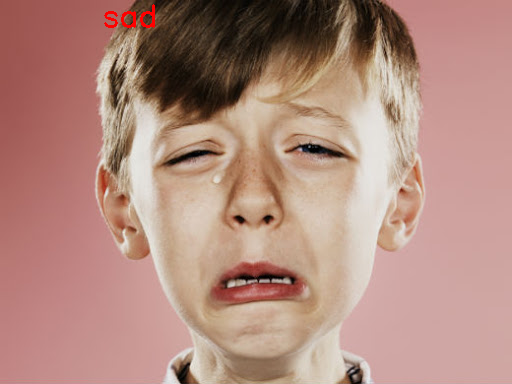

In [33]:
# load photo
test_img = cv2.imread("test_img")

# convert photo to gray scale
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

# detect face
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# perform face detection
faces_detected = classifier.detectMultiScale(gray_img)

for box in faces_detected:  
  x,  y, h, w = box
  cv2.rectangle(gray_img,(x,y),(x+w,y+h),(255,0,0),thickness=2)  
  roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image  
  roi_gray=cv2.resize(roi_gray,(48,48), interpolation = cv2.INTER_AREA)  
  img_pixels = image.img_to_array(roi_gray)  
  img_pixels = np.expand_dims(img_pixels, axis = 0)  
  img_pixels /= 255  
  
  predictions = model.predict(img_pixels)  

  #find max indexed array  
  max_index = np.argmax(predictions[0])  

  emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')  
  predicted_emotion = emotions[max_index]  

  cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, h//160, (0,0,255), 2)  

cv2_imshow(test_img)  

In [ ]:
model = FaceExpressionModel("model.json", "model_weights.h5")


In [34]:
print(predictions)

[[0.23502709 0.09915385 0.07147482 0.17368907 0.34463644 0.07601883]]
